In [1]:
%load_ext autoreload
%autoreload 2

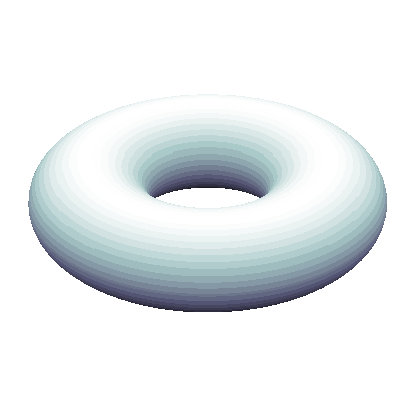

In [517]:
# Generate 3-D points on a torus and their (angle, angle) representation

import numpy as np
import matplotlib.pyplot as plt

angles1 = np.linspace(0, 2 * np.pi, 100)
angles2 = np.linspace(0, 2 * np.pi, 100)
angles1, angles2 = np.meshgrid(angles1, angles2)

R = 2  # Major radius
r = 1  # Minor radius
x = (R + r * np.cos(angles2)) * np.cos(angles1)
y = (R + r * np.cos(angles2)) * np.sin(angles1)
z = r * np.sin(angles2)
torus_3d = np.stack([x, y, z], axis=-1)
torus_3d = np.stack(
    [(R + r * np.cos(angles2)) * np.cos(angles1), (R + r * np.cos(angles2)) * np.sin(angles1), r * np.sin(angles2)],
    axis=-1,
)
torus_sxs = np.stack([np.cos(angles1), np.sin(angles1), np.cos(angles2), np.sin(angles2)], axis=-1)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="3d")

# No mesh
ax.plot_surface(
    x, y, z, cmap="bone", antialiased=False, edgecolor=(0, 0, 0, 0), linewidth=0
)  # Hack to remove mesh in PDF
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

# Turn off the axis; transparent background
ax.axis("off")
ax.patch.set_alpha(0)

# Save as pdf
plt.savefig("../figures/torus/torus1.png", bbox_inches="tight", pad_inches=0, dpi=300)

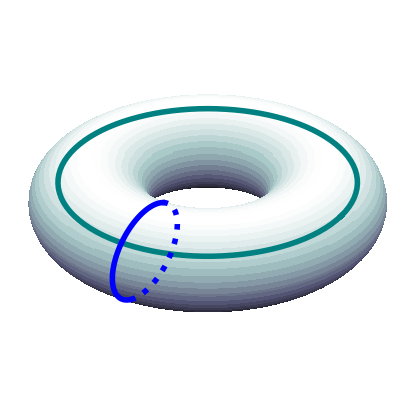

In [508]:
# Plot a circle on the top of the torus
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="3d")
# ax.plot_surface(x, y, z, cmap="viridis")
ax.plot_surface(x, y, z, cmap="bone", antialiased=False)
theta = np.linspace(0, 2 * np.pi, 100)

# Circle in 3-D: need to hack the order to get it to plot on top of the torus, even though the z-values are right
ax.plot(
    (R + r / 2) * np.cos(theta).flatten(),
    (R + r / 2) * np.sin(theta).flatten(),
    np.full_like(theta, r / 2).flatten(),
    color="teal",
    linewidth=4,
    zorder=10,
)

# x = (R + r * np.cos(angles2)) * np.cos(angles1)
# y = (R + r * np.cos(angles2)) * np.sin(angles1)
# z = r * np.sin(angles2)

# Second circle goes around somewhere - let's say where angle 1 = pi / 2
second_circle_angle = 12 * np.pi / 8
critical_val = np.pi - 1
thetas_outside = np.linspace(critical_val, critical_val + np.pi, 100)
thetas_inside = np.linspace(critical_val + np.pi, critical_val + 2 * np.pi, 100)
ax.plot(
    (R + r * np.cos(thetas_inside)).flatten() * np.cos(second_circle_angle),  # x-component
    (R + r * np.cos(thetas_inside)).flatten() * np.sin(second_circle_angle),  # y-component
    (r * np.sin(thetas_inside)).flatten(),  # z-component
    color="blue",
    linewidth=4,
    zorder=10,
)
ax.plot(
    (R + r * np.cos(thetas_outside)).flatten() * np.cos(second_circle_angle),  # x-component
    (R + r * np.cos(thetas_outside)).flatten() * np.sin(second_circle_angle),  # y-component
    (r * np.sin(thetas_outside)).flatten(),  # z-component
    color="blue",
    linewidth=4,
    zorder=10,
    linestyle="dotted",
)

# Clean up axes
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.axis("off")

# Transparent background
ax.patch.set_alpha(0)

# Save as pdf
plt.savefig("../figures/torus/torus2.png", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

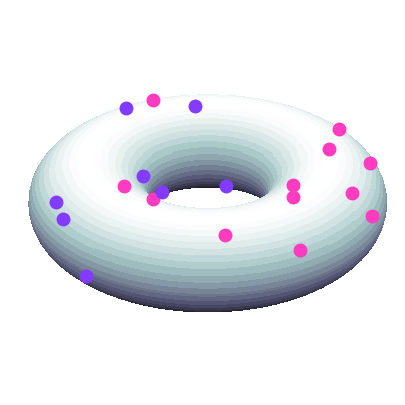

In [520]:
# Sample points
def rule(theta1, theta2):
    if theta1 > 3 * np.pi / 4 and theta1 < 7 * np.pi / 4:
        if theta2 > np.pi / 4 and theta2 < 5 * np.pi / 4:
            return 1  # purple
        else:
            return 0  # pink
    else:
        if theta1 > 3 * np.pi / 2 or theta1 < np.pi / 2:
            return 1  # blue
        else:
            return 0  # green


# Sample some points
np.random.seed(1)
theta1s = np.random.rand(20) * 2 * np.pi
theta2s = np.random.rand(20) * 2 * np.pi

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="3d")
# ax.plot_surface(x, y, z, cmap="viridis")
ax.plot_surface(x, y, z, cmap="bone", antialiased=False)
# cmap = ListedColormap(["pink", "purple", "blue", "green"])
cmap1 = ListedColormap(["#5727b0", "#b02780"])

# Lighten the colors using matplotlib - need to go from HTML to RGB
cmap1.colors = [(1.5 * np.array(mpl.colors.hex2color(color)).clip(0, 1 / 1.5)) for color in cmap.colors]


for theta1, theta2 in zip(theta1s, theta2s):
    ax.plot(
        (R + r * np.cos(theta2)) * np.cos(theta1),
        (R + r * np.cos(theta2)) * np.sin(theta1),
        r * np.sin(theta2),
        marker="o",
        markersize=9,
        color=cmap1(rule(theta1, theta2)),
        zorder=10,
        # markeredgecolor="black",
    )

# Clean up axes
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.axis("off")
ax.patch.set_alpha(0)
plt.savefig("../figures/torus/torus3.png", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

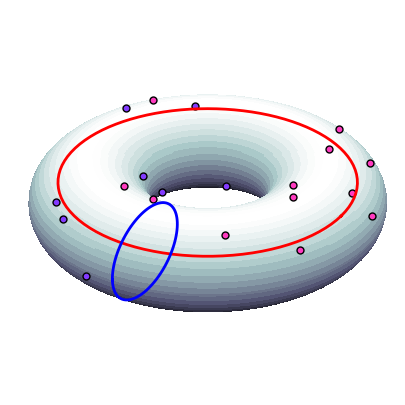

In [521]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="3d")
# ax.plot_surface(x, y, z, cmap="viridis")
ax.plot_surface(x, y, z, cmap="bone", antialiased=False)
cmap = ListedColormap(["pink", "purple", "blue", "green"])

for theta1, theta2 in zip(theta1s, theta2s):
    ax.plot(
        (R + r * np.cos(theta2)) * np.cos(theta1),
        (R + r * np.cos(theta2)) * np.sin(theta1),
        r * np.sin(theta2),
        marker="o",
        markersize=5,
        color=cmap1(rule(theta1, theta2)),
        zorder=10,
        markeredgecolor="black",
    )

# Circle in 3-D: need to hack the order to get it to plot on top of the torus, even though the z-values are right
ax.plot(
    (R + r / 2) * np.cos(theta).flatten(),
    (R + r / 2) * np.sin(theta).flatten(),
    np.full_like(theta, r / 2).flatten(),
    color="red",
    linewidth=2,
    zorder=10,
)

# x = (R + r * np.cos(angles2)) * np.cos(angles1)
# y = (R + r * np.cos(angles2)) * np.sin(angles1)
# z = r * np.sin(angles2)

# Second circle goes around somewhere - let's say where angle 1 = pi / 2
second_circle_angle = 3 * np.pi / 2
ax.plot(
    (R + r * np.cos(theta)).flatten() * np.cos(second_circle_angle),  # x-component
    (R + r * np.cos(theta)).flatten() * np.sin(second_circle_angle),  # y-component
    (r * np.sin(theta)).flatten(),  # z-component
    color="blue",
    linewidth=2,
    zorder=10,
)

# Clean up axes
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.axis("off")
ax.patch.set_alpha(0)
plt.savefig("../figures/torus/torus5.png", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

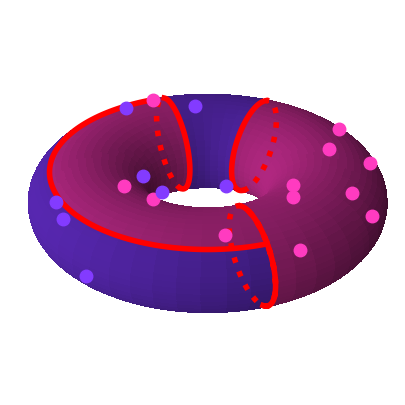

In [633]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl


# Sample points
def rule(theta1, theta2):
    if theta1 > 3 * np.pi / 4 and theta1 < 7 * np.pi / 4:
        if theta2 > np.pi / 4 and theta2 < 5 * np.pi / 4:
            return 1  # purple
        else:
            return 0  # pink
    else:
        if theta1 > 3 * np.pi / 2 or theta1 < np.pi / 2:
            return 1  # blue
        else:
            return 0  # green


# Show how the rule applies to everything
colors = np.array([rule(theta1, theta2) for theta1, theta2 in zip(angles1.flatten(), angles2.flatten())]).reshape(
    x.shape
)
# cmap1 = ListedColormap(["pink", "purple", "blue", "green"])
cmap1 = ListedColormap(["#5727b0", "#b02780"])
# cmap2 = ListedColormap(["#5727b0", "#b02780"])
# cmap1 = ListedColormap(["brown", "teal"])
cmap2 = cmap1.copy()

# Lighten the colors using matplotlib - need to go from HTML to RGB
cmap1.colors = [(1.5 * np.array(mpl.colors.hex2color(color)).clip(0, 1 / 1.5)) for color in cmap1.colors]

# Get axes
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, facecolors=cmap2(colors), antialiased=False)

# Plot the circles
#     [(R + r * np.cos(angles2)) * np.cos(angles1), (R + r * np.cos(angles2)) * np.sin(angles1), r * np.sin(angles2)],
# Angle2 = 3pi/4, which controls y and z coordinates
theta = np.linspace(0, 2 * np.pi, 100)
for ang, start, stop in zip(
    [3 * np.pi / 4 + 0.05, 7 * np.pi / 4 + 0.1, np.pi / 2 + 0.1],
    [1 * np.pi / 3, 2 * np.pi / 3, 1 * np.pi / 3],
    [4 * np.pi / 3, -1 * np.pi / 3, 4 * np.pi / 3],
):
    theta_res = np.linspace(start, stop, 100)
    theta_res2 = np.linspace(stop, start + 2 * np.pi, 100)
    for theta_res_, linestyle in zip([theta_res, theta_res2], ["solid", "dotted"]):
        ax.plot(
            (R + r * np.cos(theta_res_)).flatten() * np.cos(ang),
            (R + r * np.cos(theta_res_)).flatten() * np.sin(ang),
            (r * np.sin(theta_res_)).flatten(),
            color="red",
            linewidth=4,
            zorder=10,
            linestyle=linestyle,
        )
for ang in [np.pi / 4 + 0.1]:  # , 5 * np.pi / 4, 0, np.pi]:
    theta_res = np.linspace(3 * np.pi / 4 + 0.1, 7 * np.pi / 4 + 0.1, 100)
    ax.plot(
        (R + r * np.cos(ang)) * np.cos(theta_res),
        (R + r * np.cos(ang)) * np.sin(theta_res),
        (r * np.sin(ang)),
        color="red",
        linewidth=4,
        zorder=10,
    )


# Put points back on
for theta1, theta2 in zip(theta1s, theta2s):
    ax.plot(
        (R + r * np.cos(theta2)) * np.cos(theta1),
        (R + r * np.cos(theta2)) * np.sin(theta1),
        r * np.sin(theta2),
        marker="o",
        markersize=9,
        color=cmap1(rule(theta1, theta2)),
        zorder=10,
        # markeredgecolor="black",
    )

# Clean up axes
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.axis("off")
# Make background actually transparent
ax.patch.set_alpha(0)
plt.savefig("../figures/torus/torus4.png", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

In [391]:
# Factor hyperparameters
CIRCLE_LW = 18
MARKER_LW = 0
MARKER_SIZE = 36

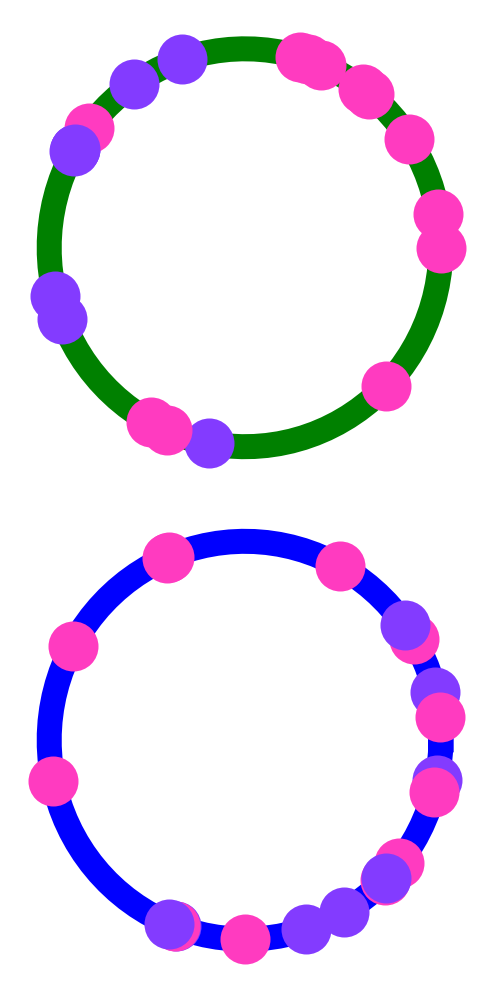

In [530]:
# Show projections

# circ_x = np.linspace(-1, 1, 100)
# circ_y = np.stack([np.sqrt(1 - circ_x**2), -np.sqrt(1 - circ_x**2)], axis=-1)
# circ_x = np.stack([circ_x, circ_x], axis=-1)
circ_x, circ_y = np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100))

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(circ_x, circ_y, color="green", lw=CIRCLE_LW)
axs[1].plot(circ_x, circ_y, color="blue", lw=CIRCLE_LW)

# Put points back on
for theta1, theta2 in zip(theta1s, theta2s):
    c = cmap1(rule(theta1, theta2))
    axs[0].plot(
        np.cos(theta1),
        np.sin(theta1),
        marker="o",
        markersize=MARKER_SIZE,
        color=c,
        zorder=10,
        markeredgecolor="black",
        markeredgewidth=MARKER_LW,
    )
    axs[1].plot(
        np.cos(theta2),
        np.sin(theta2),
        marker="o",
        markersize=MARKER_SIZE,
        color=c,
        zorder=10,
        markeredgecolor="black",
        markeredgewidth=MARKER_LW,
    )

for ax in axs:
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis("off")
    ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("../figures/torus/factors1.pdf", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

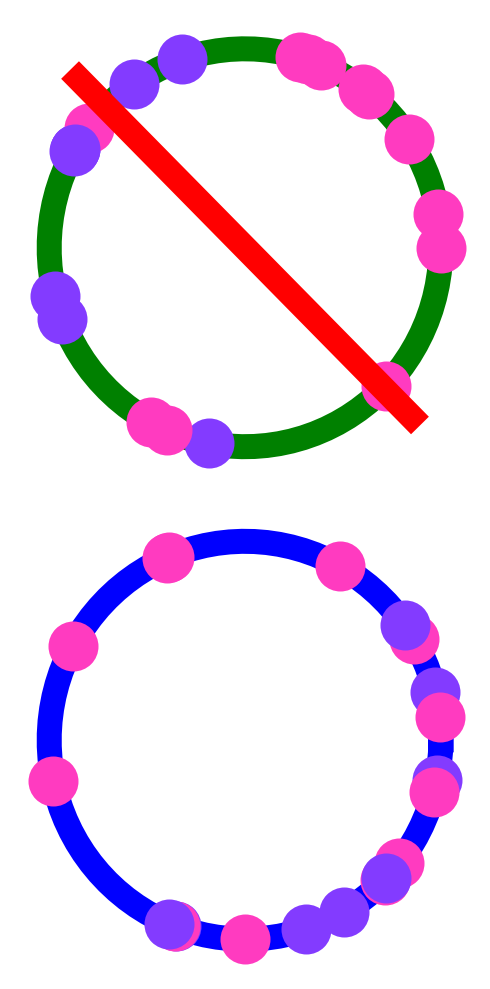

In [634]:
# First boundary

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(circ_x, circ_y, color="green", lw=CIRCLE_LW)
axs[1].plot(circ_x, circ_y, color="blue", lw=CIRCLE_LW)

# Put points back on
for theta1, theta2 in zip(theta1s, theta2s):
    c = cmap1(rule(theta1, theta2))
    axs[0].plot(
        np.cos(theta1),
        np.sin(theta1),
        marker="o",
        markersize=MARKER_SIZE,
        color=c,
        zorder=10,
        markeredgecolor="black",
        markeredgewidth=MARKER_LW,
    )
    axs[1].plot(
        np.cos(theta2),
        np.sin(theta2),
        marker="o",
        markersize=MARKER_SIZE,
        color=c,
        zorder=10,
        markeredgecolor="black",
        markeredgewidth=MARKER_LW,
    )

# Boundary 1: theta1 = 3pi/4
b1_x, b1_y = np.cos(3 * np.pi / 4), np.sin(3 * np.pi / 4)
b1_x, b1_y = 1.2 * b1_x, 1.2 * b1_y
axs[0].plot([-b1_x, b1_x], [-b1_y, b1_y], color="red", lw=CIRCLE_LW, zorder=100)

for ax in axs:
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis("off")
    ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("../figures/torus/factors2.pdf", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

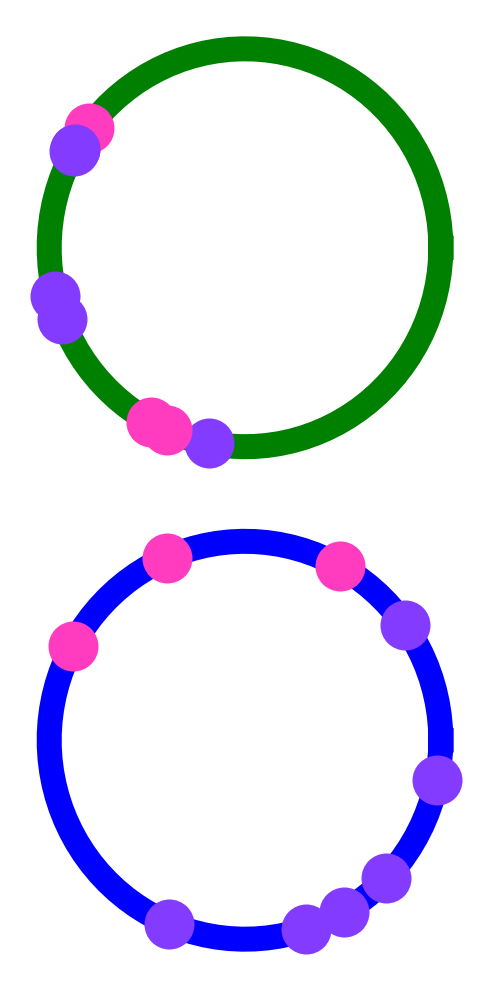

In [532]:
# POSITIVE CLASS
# First boundary - filter points to theta1 in (3pi/4, 7pi/4)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(circ_x, circ_y, color="green", lw=CIRCLE_LW)
axs[1].plot(circ_x, circ_y, color="blue", lw=CIRCLE_LW)

# Put points back on
for theta1, theta2 in zip(theta1s, theta2s):
    if theta1 > 3 * np.pi / 4 and theta1 < 7 * np.pi / 4:
        c = cmap1(rule(theta1, theta2))
        axs[0].plot(
            np.cos(theta1),
            np.sin(theta1),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )
        axs[1].plot(
            np.cos(theta2),
            np.sin(theta2),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )

for ax in axs:
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis("off")
    ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("../figures/torus/factors3.pdf", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

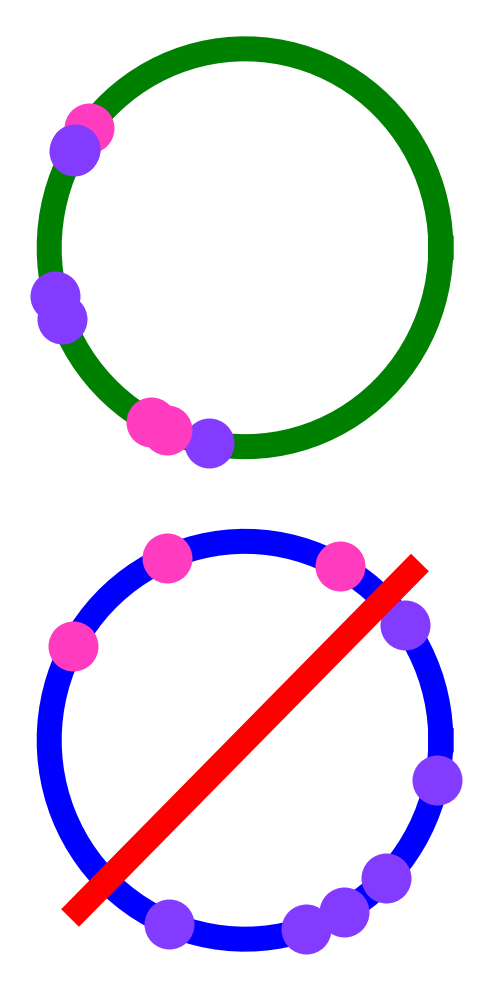

In [635]:
# POSITIVE CLASS
# First boundary - filter points to theta1 in (3pi/4, 7pi/4)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(circ_x, circ_y, color="green", lw=CIRCLE_LW)
axs[1].plot(circ_x, circ_y, color="blue", lw=CIRCLE_LW)

# Put points back on
for theta1, theta2 in zip(theta1s, theta2s):
    if theta1 > 3 * np.pi / 4 and theta1 < 7 * np.pi / 4:
        c = cmap1(rule(theta1, theta2))
        axs[0].plot(
            np.cos(theta1),
            np.sin(theta1),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )
        axs[1].plot(
            np.cos(theta2),
            np.sin(theta2),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )

# Boundary 1: theta2 between pi/4 and 5pi/4
b1_x, b1_y = np.cos(np.pi / 4), np.sin(np.pi / 4)
b1_x, b1_y = 1.2 * b1_x, 1.2 * b1_y
axs[1].plot([-b1_x, b1_x], [-b1_y, b1_y], color="red", lw=CIRCLE_LW, zorder=100)

for ax in axs:
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis("off")
    ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("../figures/torus/factors4.pdf", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

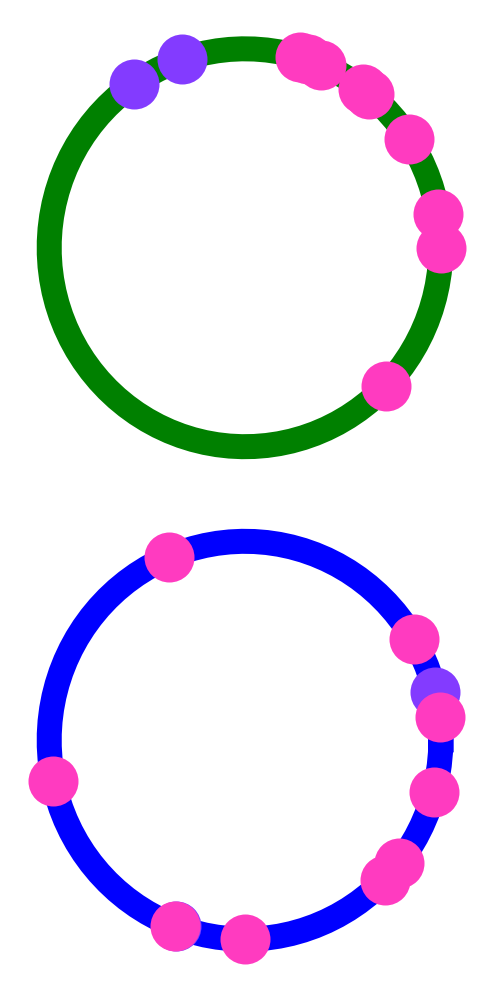

In [534]:
# NEGATIVE CLASS
# First boundary - filter points to theta1 outside (3pi/4, 7pi/4)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(circ_x, circ_y, color="green", lw=CIRCLE_LW)
axs[1].plot(circ_x, circ_y, color="blue", lw=CIRCLE_LW)

# Put points back on
for theta1, theta2 in zip(theta1s, theta2s):
    if theta1 <= 3 * np.pi / 4 or theta1 >= 7 * np.pi / 4:
        c = cmap1(rule(theta1, theta2))
        axs[0].plot(
            np.cos(theta1),
            np.sin(theta1),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )
        axs[1].plot(
            np.cos(theta2),
            np.sin(theta2),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )

for ax in axs:
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis("off")
    ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("../figures/torus/factors5.pdf", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

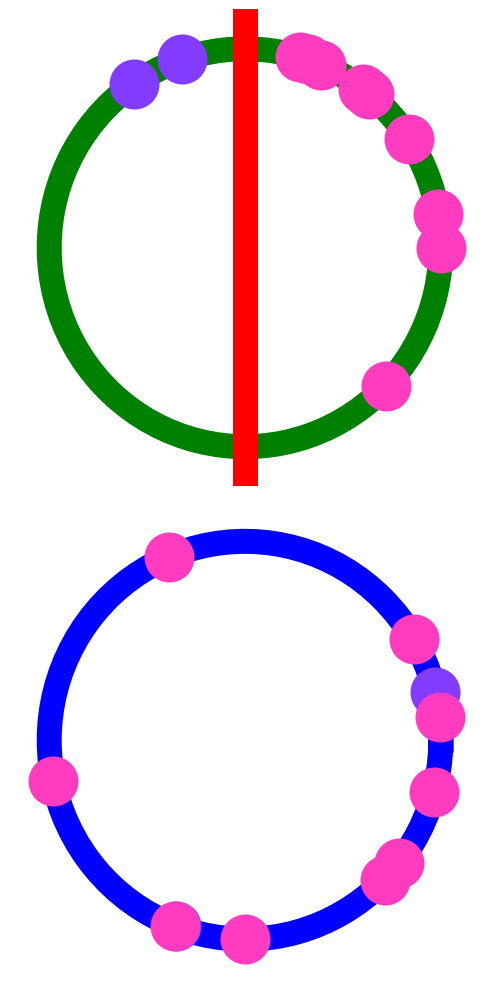

In [636]:
# NEGATIVE CLASS
# First boundary - filter points to theta1 outside (3pi/4, 7pi/4)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs[0].plot(circ_x, circ_y, color="green", lw=CIRCLE_LW)
axs[1].plot(circ_x, circ_y, color="blue", lw=CIRCLE_LW)

# Put points back on
for theta1, theta2 in zip(theta1s, theta2s):
    if theta1 <= 3 * np.pi / 4 or theta1 >= 7 * np.pi / 4:
        c = cmap1(rule(theta1, theta2))
        axs[0].plot(
            np.cos(theta1),
            np.sin(theta1),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )
        axs[1].plot(
            np.cos(theta2),
            np.sin(theta2),
            marker="o",
            markersize=MARKER_SIZE,
            color=c,
            zorder=10,
            markeredgecolor="black",
            markeredgewidth=MARKER_LW,
        )

# Boundary 2: theta1 > 3 * np.pi / 2 or theta1 < np.pi / 2
b1_x, b1_y = np.cos(3 * np.pi / 2), np.sin(3 * np.pi / 2)
b1_x, b1_y = 1.2 * b1_x, 1.2 * b1_y
axs[0].plot([-b1_x, b1_x], [-b1_y, b1_y], color="red", lw=CIRCLE_LW, zorder=100)

for ax in axs:
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis("off")
    ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("../figures/torus/factors6.pdf", bbox_inches="tight", pad_inches=0, dpi=300, transparent=True)

In [637]:
# What is the hex code for mpl "green"?

mpl.colors.to_hex(mpl.colors.to_rgb("green"))

'#008000'